# ANLY590 Assignment 2
## Jiaqi Hu
### 1. Feedforward
#### 1

![pic](a2.png "network")

#### 2
$h_1 = ReLU (w_{11}x_1 + w_{12}x_2 + w_{13}x_3 + b_1)$  
$h_2 = ReLU (w_{21}x_1 + w_{22}x_2 + w_{23}x_3 + b_2)$  
$h_3 = ReLU (w_{31}x_1 + w_{32}x_2 + w_{33}x_3 + b_3)$  
$y = \frac{1}{1+e^{-(v_1h_1 + v_2h_2 + v_3h_3)}}$  
#### 3

In [1]:
import numpy as np

def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

# ReLU function
def ReLu(x):
    return np.maximum(x,0)

# Logistic unit
def logistic(x,w,b):
    s = sigmoid(a(x,w,b))
    y = np.round(s)
    return np.array([y,s]).T

In [2]:
def ff_nn_ReLu(x,w,v,b,c):
    '''
    A simple 2 layer neural network with relu activation and binary output.
    '''
    # Setting up our output y
    num_rows,num_columns = x.shape
    y = np.zeros((num_rows))
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Relu activations into hidden units
        a1 = x_i[0]*w[0,0] + x_i[1]*w[1,0] + b[0]
        a2 = x_i[0]*w[0,1] + x_i[1]*w[1,1] + b[1]
        a3 = x_i[0]*w[0,2] + x_i[1]*w[1,2] + b[2]
        
        # output of hidden units
        h_1 = ReLu(a1)
        h_2 = ReLu(a2)
        h_3 = ReLu(a3)
        h = np.array([h_1,h_2,h_3])
        
        # Output of network
        y[i] = sigmoid(h_1*v[0] + h_2*v[1] + h_3*v[2] + c)
    
    return np.array(y)

#### 4

In [3]:
W = np.array([1, -1, 0, 0, 0, .5]).reshape(2,3)
b = np.array([0, 0, 1])
V = np.array([1, 0, -1])
c = np.array([1])
X = np.array([1, -1, 0, -1, 0, 1]).reshape(3,2)

In [4]:
prob = ff_nn_ReLu(X, W, V, b, c)

In [5]:
for i in range(X.shape[0]):
    print('Sample ', X[i,:], 'has class probability ', prob[i], '\n')

Sample  [ 1 -1] has class probability  0.8175744761936437 

Sample  [ 0 -1] has class probability  0.6224593312018546 

Sample  [0 1] has class probability  0.3775406687981454 



The first sample belongs to class 1  
The second sample belongs to class 1  
The third sample belongs to class 0

### 2. Gradient Descent
#### 1
$\frac{\partial f}{\partial x} = -3x^2 + 200x -200y^2$  
$\frac{\partial f}{\partial y} = 400y^3-400xy$
#### 2

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

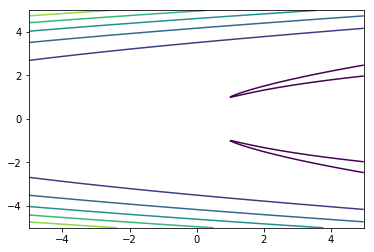

In [7]:
delta = 0.02
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100*((Y**2 - X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 3

In [8]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 200*x - 200*y**2 
    df_dy = 400*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [9]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

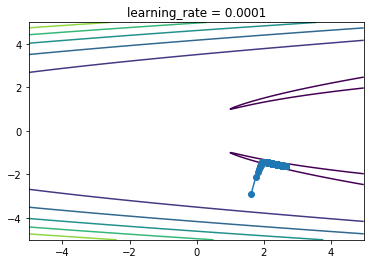

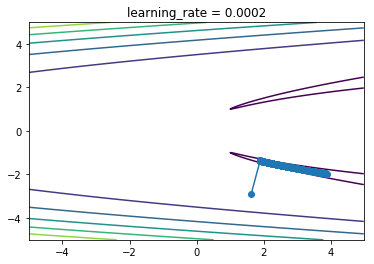

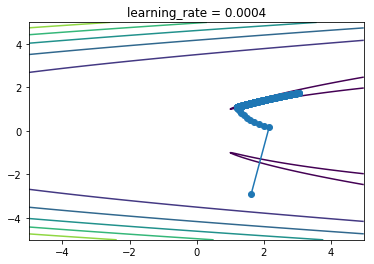

In [10]:

for l in [0.0001, 0.0002, 0.0004]:
    np.random.seed(10)
    traj = grad_descent(iterations=500, learning_rate=l)
    #print(traj)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('learning_rate = ' + str(l))
    plt.plot(x,y,'-o')


The function is decreasing to negative infinity when x and y go to infinity. $x = y^2$
### 4

In [11]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

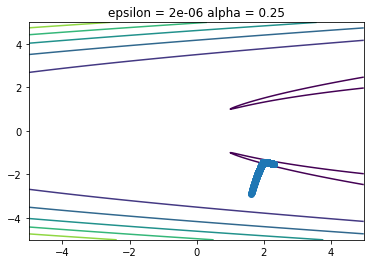

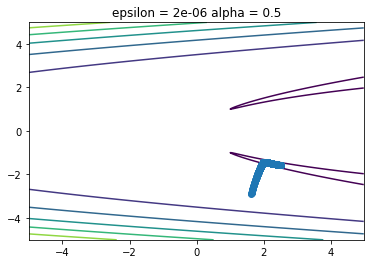

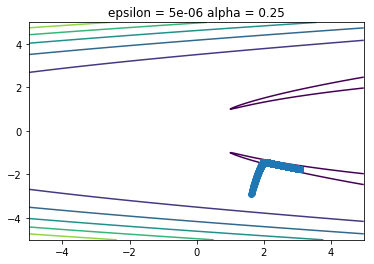

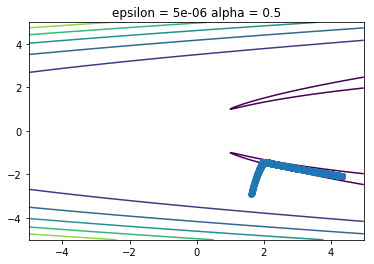

In [12]:
for l in [0.000002, 0.000005]:
    for a in [0.25, 0.5]:
        np.random.seed(10)
        traj = grad_descent_with_momentum(iterations=10000, epsilon=l, alpha=a)

        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z)
        x= traj[:,0]
        y= traj[:,1]
        #print(x[0],y[0])
        #print(x[-1],y[-1])
        plt.title('epsilon = '+str(l)+ ' alpha = '+ str(a))
        plt.plot(x,y,'-o')

### 3. Backprop
![pic](a2.png "network")
#### 1

$h_1 = ReLU (w_{11}x_1 + w_{12}x_2 + w_{13}x_3 + b_1)$  
$h_2 = ReLU (w_{21}x_1 + w_{22}x_2 + w_{23}x_3 + b_2)$  
$h_3 = ReLU (w_{31}x_1 + w_{32}x_2 + w_{33}x_3 + b_3)$  
$y = \frac{1}{1+e^{-(v_1h_1 + v_2h_2 + v_3h_3)}}$ 

$L = -y_i \text{log}(\hat y_i) - (1-y_i)\text{log}(1-\hat y_i)$  
$\frac{d L}{d \hat{c}} = -(y_i- \hat{y}(x_i))$  
$\frac{d L}{d \hat{y}} = -\big(\frac {y_i}{\hat{y_i}} - \frac{1-y_i}{1-\hat{y_i}}\big)$  
$\frac{\partial L}{\partial v_1} = \frac{d L}{d \hat{y}}out_1 =  \frac{d L}{d \hat{y}} h_1$  
$\frac{\partial L}{\partial v_2} = \frac{d L}{d \hat{y}}out_2 = \frac{d L}{d \hat{y}} h_2$  
$\frac{\partial L}{\partial v_3} = \frac{d L}{d \hat{y}}out_3 = \frac{d L}{d \hat{y}} h_3$  
$\frac{\partial L}{\partial b_1} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_1} \frac{d out_1}
{d in_1}\frac{\partial in_1}{\partial b_1}$  
$\frac{\partial L}{\partial b_2} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_2} \frac{d out_2}
{d in_2}\frac{\partial in_2}{\partial b_2}$  
$\frac{\partial L}{\partial b_3} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_3} \frac{d out_3}
{d in_3}\frac{\partial in_3}{\partial b_3}$  
$\frac{\partial L}{\partial W_{11}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_1}\frac{d out_1}
{d in_1} \frac{\partial in_1}{\partial W_{11}}$  
$\frac{\partial L}{\partial W_{21}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_1}\frac{d out_1}
{d in_1} \frac{\partial in_1}{\partial W_{21}}$   
$\frac{\partial L}{\partial W_{12}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_2}\frac{d out_2}
{d in_2} \frac{\partial in_2}{\partial W_{12}}$  
$\frac{\partial L}{\partial W_{22}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_2}\frac{d out_2}
{d in_2} \frac{\partial in_2}{\partial W_{22}}$  
$\frac{\partial L}{\partial W_{13}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_3}\frac{d out_3}
{d in_3} \frac{\partial in_3}{\partial W_{13}}$  
$\frac{\partial L}{\partial W_{23}} = \frac{d L}{d \hat{y}} \frac{\partial \hat{y}}{\partial out_3}\frac{d out_3}
{d in_3} \frac{\partial in_3}{\partial W_{23}}$  
#### 2

In [13]:
def grad_f(x,y,params):
    w,v,b,c = params
    h = ReLu(np.dot(x, W) + b)
    y_hat = sigmoid(np.dot(h,v) + c)
    y = y.reshape(500,1)
    d_c = (y_hat-y).sum()
    d_v = h.T.dot(y_hat-y)
    d_b = ((y_hat-y).dot(v.T)*d_relu(h)).sum(axis=0)
    d_W = x.T.dot((y_hat-y).dot(v.T)*d_relu(h))
    return (d_W,d_v,d_b,d_c)

In [14]:
def initialize_params():
    w = np.random.randn(6).reshape(2,3)
    v = np.random.randn(3).reshape(3,1)
    b = np.random.randn(3).reshape(1,3)
    c = np.random.randn(1).reshape(1,1)
    return (w,v,b,c)
params = initialize_params()


In [24]:
def loss(y,y_hat):
    return np.average(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

def grad_loss(y,yhat):
    -y/yhat + (1-y)/(1-yhat)

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def d_relu(x):
    return np.where(x>0, 1, 0)

In [25]:
def ff_nn_2_ReLu(x, params):
    w,v,b,c = params
    h = ReLu(np.dot(x, w) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

#### 3

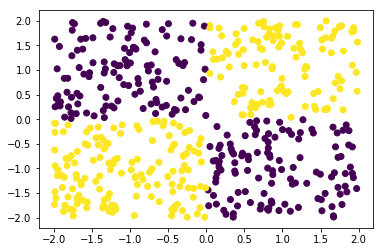

In [26]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

#### 4

In [27]:
def grad_descent(x, y, starting_point=params, iterations=10, learning_rate=1e-2):

    point = starting_point
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x, point))]

    for i in range(iterations):
        grads =  grad_f(x, y,point)
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
            
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, point)))
    return (np.array(trajectory), losses)

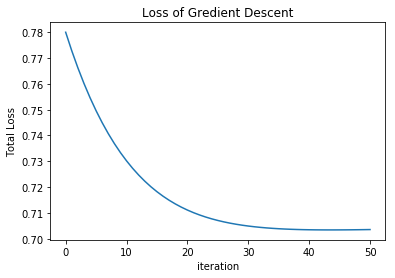

In [69]:
traj, losses = grad_descent(x, y, starting_point=params,iterations=50,learning_rate=1e-4)
plt.xlabel('iteration')
plt.ylabel('Total Loss')
plt.title('Loss of Gredient Descent')
plt.plot(losses)

#### 5


In [43]:
def grad_descent_momentum(x, y, starting_point, iterations=10, learning_rate=1e-4,alpha=0.001):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x, point))]
    prev=None
    for i in range(iterations):
        grads = grad_f( x, y,point)
        update = []
        if not prev:
            for (matrix, grad) in zip(point, grads):
                update.append(matrix - learning_rate*grad)
        else:
            for (matrix, grad, prevs) in zip(point, grads,prev):
                update.append(matrix - learning_rate*grad - alpha*prevs)
        prev = grads
        point = tuple(update)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, point)))
    return (np.array(trajectory), losses)

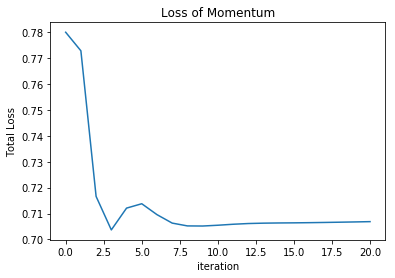

In [70]:
traj2, losses2 = grad_descent_momentum(x, y, starting_point=params, iterations=20,learning_rate=1e-4,alpha=0.001)
plt.title("Loss of Momentum")
plt.xlabel('iteration')
plt.ylabel('Total Loss')
plt.plot(losses2)

#### 6

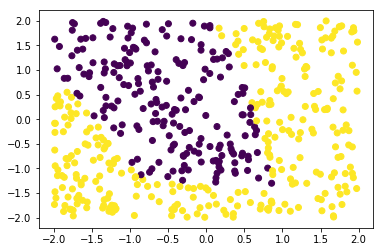

In [76]:
y_pred=ff_nn_2_ReLu(x, traj2[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0

plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(500))

In [82]:
def plot_decision_boundary(x,params):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    z=ff_nn_2_ReLu(_in,params)
    z=z>0.5
    z=z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.title("Decision Boundary")
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))

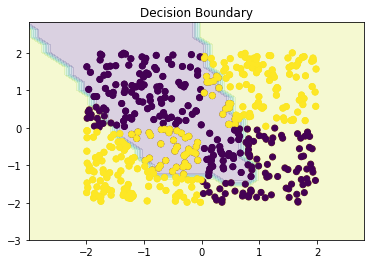

In [83]:
y_pred=ff_nn_2_ReLu(x, traj2[-1])
y_pred[y_pred >=0.5] = 1
y_pred[y_pred < 0.5] = 0

plt.scatter(x[:,0],x[:,1],c=y_pred.reshape(500))
plot_decision_boundary(x,traj2[-1])